<a href="https://colab.research.google.com/github/pramod12r/MLProjects/blob/main/DCNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import shutil
import glob
import zipfile

drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive"

DATASET_PATH = "/content/dataset/"
os.makedirs(DATASET_PATH, exist_ok=True)

!kaggle datasets download -d ejlok1/cremad -p /content/ --force
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess -p /content/ --force
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio -p /content/ --force

!unzip -o -q "/content/cremad.zip" -d "/content/dataset/"
!unzip -o -q "/content/toronto-emotional-speech-set-tess.zip" -d "/content/dataset/"`
!unzip -o -q "/content/ravdess-emotional-speech-audio.zip" -d "/content/ravdess_temp"

RAVDESS_SRC = "/content/ravdess_temp/Actor_*"
RAVDESS_DST = os.path.join(DATASET_PATH, "ravdess")
os.makedirs(RAVDESS_DST, exist_ok=True)
for file in glob.glob(RAVDESS_SRC + "/**/*.wav", recursive=True):
    shutil.move(file, os.path.join(RAVDESS_DST, os.path.basename(file)))

CREMA_SRC = "/content/dataset/AudioWAV"
CREMA_DST = os.path.join(DATASET_PATH, "cremad")
os.makedirs(CREMA_DST, exist_ok=True)
for file in glob.glob(os.path.join(CREMA_SRC, "*.wav")):
    shutil.move(file, os.path.join(CREMA_DST, os.path.basename(file)))

TESS_DST = os.path.join(DATASET_PATH, "tess")
os.makedirs(TESS_DST, exist_ok=True)
for tess_folder in ["TESS Toronto emotional speech set data", "tess toronto emotional speech set data"]:
    tess_path = os.path.join(DATASET_PATH, tess_folder)
    if os.path.exists(tess_path):
        for file in glob.glob(os.path.join(tess_path, "**/*.wav"), recursive=True):
            shutil.move(file, os.path.join(TESS_DST, os.path.basename(file)))

print("\n Dataset folders standardized successfully!")

def count_wav_files(directory):
    return len(glob.glob(os.path.join(directory, "*.wav")))

ravdess_count = count_wav_files(RAVDESS_DST)
cremad_count = count_wav_files(CREMA_DST)
tess_count = count_wav_files(TESS_DST)

print("\n Dataset Verification:")
print(f" RAVDESS: {ravdess_count} audio files")
print(f" CREMA-D: {cremad_count} audio files")
print(f" TESS: {tess_count} audio files")

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 98% 441M/451M [00:06<00:00, 87.9MB/s]
100% 451M/451M [00:06<00:00, 76.0MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 94% 401M/428M [00:01<00:00, 330MB/s]
100% 428M/428M [00:01<00:00, 374MB/s]
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100% 428M/429M [00:02<00:00, 84.4MB/s]
100% 429M/429M [00:02<00:00, 156MB/s] 

 Dataset folders standardized successfully!

 Dataset Verification:
 RAVDESS: 1440 audio files
 CREMA-D: 7442 audio files
 TESS: 2800 audio files


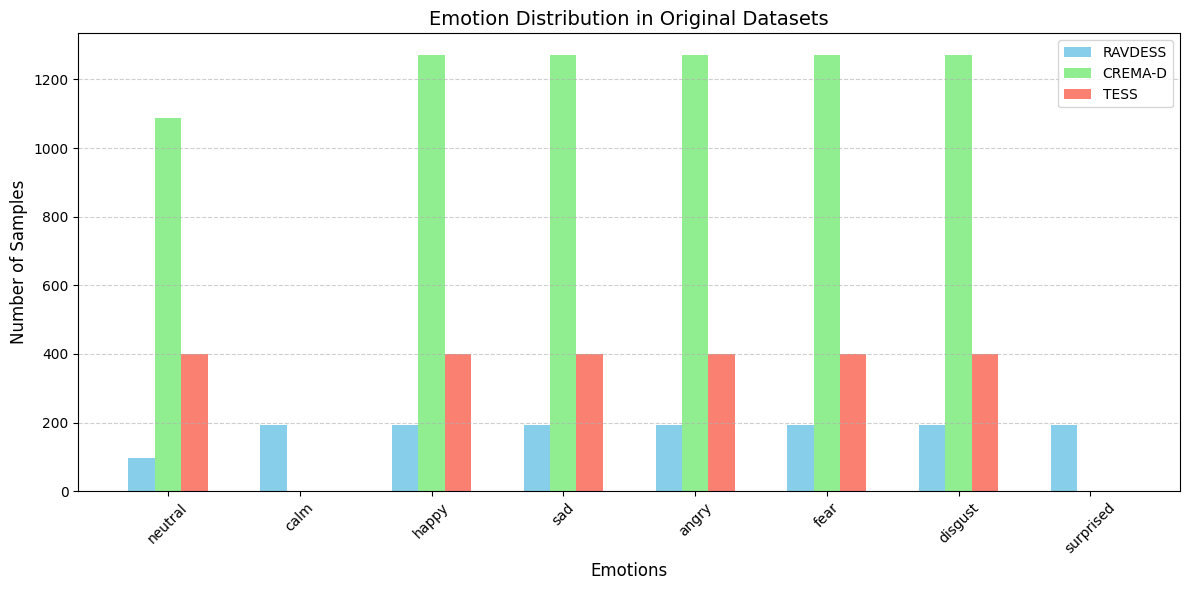

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

DATASET_PATH = "/content/dataset/"
RAVDESS_PATH = os.path.join(DATASET_PATH, "ravdess")
CREMAD_PATH = os.path.join(DATASET_PATH, "cremad")
TESS_PATH = os.path.join(DATASET_PATH, "tess")

# Unified emotion labels
unified_emotions = ["neutral", "calm", "happy", "sad", "angry", "fear", "disgust", "surprised"]

# Dataset-specific mappings
emotion_map_ravdess = {
    "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
    "05": "angry", "06": "fear", "07": "disgust", "08": "surprised"
}

emotion_map_cremad = {
    "SAD": "sad", "ANG": "angry", "DIS": "disgust",
    "FEA": "fear", "HAP": "happy", "NEU": "neutral"
}

def get_tess_emotion(filename):
    parts = filename.split("_")
    if len(parts) > 1:
        emotion = parts[-1].replace(".wav", "").lower()
        return "fear" if emotion == "fearful" else emotion
    return None

def count_emotions(dataset_path, dataset_name):
    emotion_counts = {emotion: 0 for emotion in unified_emotions}
    for file in os.listdir(dataset_path):
        emotion = None
        if dataset_name == "ravdess" and "-" in file:
            emotion_id = file.split("-")[2]
            emotion = emotion_map_ravdess.get(emotion_id)
        elif dataset_name == "cremad" and "_" in file:
            emotion_code = file.split("_")[2]
            emotion = emotion_map_cremad.get(emotion_code)
        elif dataset_name == "tess" and "_" in file:
            emotion = get_tess_emotion(file)
        if emotion in emotion_counts:
            emotion_counts[emotion] += 1
    return emotion_counts

# Count emotions per dataset
ravdess_counts = count_emotions(RAVDESS_PATH, "ravdess")
cremad_counts = count_emotions(CREMAD_PATH, "cremad")
tess_counts = count_emotions(TESS_PATH, "tess")

# Prepare for plotting
emotions = unified_emotions
ravdess_values = [ravdess_counts[e] for e in emotions]
cremad_values = [cremad_counts[e] for e in emotions]
tess_values = [tess_counts[e] for e in emotions]

# Plot settings
bar_width = 0.2
x = np.arange(len(emotions))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, ravdess_values, bar_width, label="RAVDESS", color="skyblue")
plt.bar(x, cremad_values, bar_width, label="CREMA-D", color="lightgreen")
plt.bar(x + bar_width, tess_values, bar_width, label="TESS", color="salmon")

plt.xlabel("Emotions", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.title("Emotion Distribution in Original Datasets", fontsize=14)
plt.xticks(ticks=x, labels=emotions, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
!pip install noisereduce

In [ ]:
import librosa
import numpy as np
import noisereduce as nr
import os
from tqdm import tqdm
import soundfile as sf

# Parameters
TARGET_SAMPLE_RATE = 16000  # Hz
TARGET_DURATION = 3  # seconds
TARGET_LENGTH = TARGET_SAMPLE_RATE * TARGET_DURATION  # 48000 samples

# Emotion mappings
ravdess_emotion_map = {
    "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
    "05": "angry", "06": "fear", "07": "disgust", "08": "surprised"
}

def detect_emotion_from_filename(filename):
    filename = filename.lower()

    try:
        # RAVDESS format check
        if filename.startswith("03-") or len(filename.split("-")) == 7:
            emotion_id = filename.split("-")[2]
            return ravdess_emotion_map.get(emotion_id)

        # CREMA-D
        elif "_ang" in filename:
            return "angry"
        elif "_dis" in filename:
            return "disgust"
        elif "_fea" in filename:
            return "fear"
        elif "_hap" in filename:
            return "happy"
        elif "_neu" in filename:
            return "neutral"
        elif "_sad" in filename:
            return "sad"

        # TESS
        elif "angry" in filename:
            return "angry"
        elif "disgust" in filename:
            return "disgust"
        elif "fear" in filename:
            return "fear"
        elif "happy" in filename:
            return "happy"
        elif "neutral" in filename:
            return "neutral"
        elif "sad" in filename:
            return "sad"
        elif "surprise" in filename or "ps" in filename:
            return "surprised"
    except:
        return None
    return None

def preprocess_audio(file_path, save_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)

        # Noise reduction
        audio = nr.reduce_noise(y=audio, sr=sr)

        # Resample if needed
        if sr != TARGET_SAMPLE_RATE:
            audio = librosa.resample(audio, orig_sr=sr, target_sr=TARGET_SAMPLE_RATE)

        # Trim or pad
        if len(audio) > TARGET_LENGTH:
            audio = audio[:TARGET_LENGTH]
        else:
            padding = TARGET_LENGTH - len(audio)
            audio = np.pad(audio, (0, padding), mode='constant')

        # Normalize
        if np.max(np.abs(audio)) > 0:
            audio = audio / np.max(np.abs(audio))

        # Save
        sf.write(save_path, audio, TARGET_SAMPLE_RATE)
        return audio

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Paths
dataset_paths = [
    "/content/dataset/ravdess",
    "/content/dataset/cremad",
    "/content/dataset/tess"
]

processed_data_dirs = {
    "ravdess": "/content/dataset/ravdess_processed",
    "cremad": "/content/dataset/cremad_processed",
    "tess": "/content/dataset/tess_processed"
}

# Create processed dirs
for path in processed_data_dirs.values():
    os.makedirs(path, exist_ok=True)

# Store processed data
X = []
y = []

# Process each dataset
for dataset_path in dataset_paths:
    dataset_name = os.path.basename(dataset_path)
    processed_dir = processed_data_dirs[dataset_name]

    print(f"\nProcessing dataset: {dataset_name}")
    all_files = [f for f in os.listdir(dataset_path) if f.endswith(".wav")]

    for file_name in tqdm(all_files, desc=f"Processing {dataset_name}", total=len(all_files)):
        file_path = os.path.join(dataset_path, file_name)
        save_path = os.path.join(processed_dir, file_name)

        # Emotion label
        emotion = detect_emotion_from_filename(file_name)
        if emotion is None:
            print(f"Skipping file due to unknown emotion: {file_name}")
            continue

        # Preprocess
        processed_audio = preprocess_audio(file_path, save_path)
        if processed_audio is not None:
            X.append(processed_audio)
            y.append(emotion)

print("\n Preprocessing completed and audio files saved successfully!")
print(f" Total processed samples: {len(X)}")



Processing dataset: ravdess


Processing ravdess: 100%|██████████| 1440/1440 [02:31<00:00,  9.51it/s]



Processing dataset: cremad


Processing cremad:  70%|██████▉   | 5204/7442 [03:42<01:30, 24.80it/s]/usr/local/lib/python3.11/dist-packages/noisereduce/spectralgate/nonstationary.py:70: RuntimeWarning: invalid value encountered in divide
  sig_mult_above_thresh = (abs_sig_stft - sig_stft_smooth) / sig_stft_smooth
Processing cremad: 100%|██████████| 7442/7442 [05:19<00:00, 23.32it/s]



Processing dataset: tess


Processing tess: 100%|██████████| 2800/2800 [02:15<00:00, 20.73it/s]


 Preprocessing completed and audio files saved successfully!
 Total processed samples: 11682


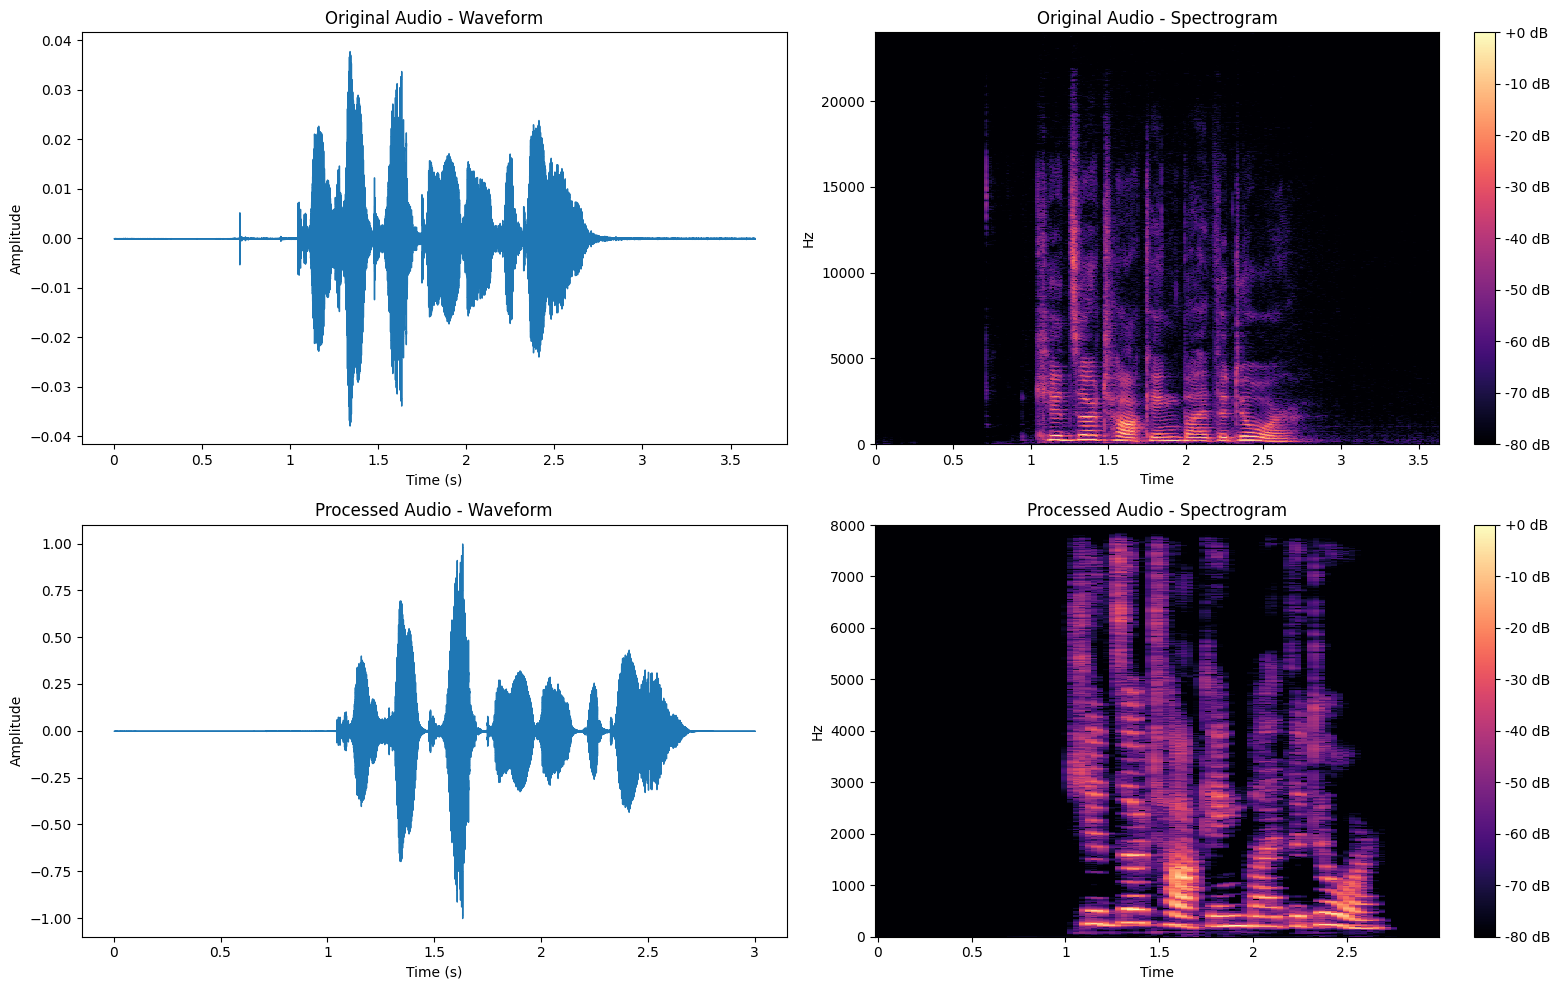


 Original Audio:



 Processed Audio:


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

# Paths
original_audio_path = '/content/dataset/ravdess/03-01-01-01-01-01-12.wav'
processed_audio_path = '/content/dataset/ravdess_processed/03-01-01-01-01-01-12.wav'

# Load original
original_audio, sr_original = librosa.load(original_audio_path, sr=None)

# Load processed
processed_audio, sr_processed = librosa.load(processed_audio_path, sr=None)

# Plotting
plt.figure(figsize=(16, 10))

# --- Original Audio Waveform ---
plt.subplot(2, 2, 1)
librosa.display.waveshow(original_audio, sr=sr_original)
plt.title('Original Audio - Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# --- Original Audio Spectrogram ---
plt.subplot(2, 2, 2)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)), ref=np.max)
librosa.display.specshow(D_original, sr=sr_original, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio - Spectrogram')

# --- Processed Audio Waveform ---
plt.subplot(2, 2, 3)
librosa.display.waveshow(processed_audio, sr=sr_processed)
plt.title('Processed Audio - Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# --- Processed Audio Spectrogram ---
plt.subplot(2, 2, 4)
D_processed = librosa.amplitude_to_db(np.abs(librosa.stft(processed_audio)), ref=np.max)
librosa.display.specshow(D_processed, sr=sr_processed, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Processed Audio - Spectrogram')

plt.tight_layout()
plt.show()

print("\n Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

print("\n Processed Audio:")
ipd.display(ipd.Audio(processed_audio, rate=sr_processed))

In [ ]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tens

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import os
import numpy as np
import librosa
import pickle
from tqdm import tqdm

processed_dirs = {
    "ravdess": "/content/dataset/ravdess_processed",
    "cremad": "/content/dataset/cremad_processed",
    "tess": "/content/dataset/tess_processed"
}

SAMPLE_RATE = 16000
N_MFCC = 40
N_MELS = 40
MAX_LEN = 173

features = []
labels = []

def detect_emotion_from_filename(filename):
    filename = filename.lower()
    if filename.startswith("03-"):
        return {
            "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
            "05": "angry", "06": "fear", "07": "disgust", "08": "surprised"
        }.get(filename.split("-")[2])
    elif "_ang" in filename: return "angry"
    elif "_dis" in filename: return "disgust"
    elif "_fea" in filename: return "fear"
    elif "_hap" in filename: return "happy"
    elif "_neu" in filename: return "neutral"
    elif "_sad" in filename: return "sad"
    elif "angry" in filename: return "angry"
    elif "disgust" in filename: return "disgust"
    elif "fear" in filename: return "fear"
    elif "happy" in filename: return "happy"
    elif "neutral" in filename: return "neutral"
    elif "sad" in filename: return "sad"
    elif "surprise" in filename or "ps" in filename: return "surprised"
    return None

def normalize(x):
    std = np.std(x)
    return (x - np.mean(x)) / std if std != 0 else x

def extract_features(audio, sr):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    mfcc = normalize(mfcc)
    mel_db = normalize(mel_db)

    mfcc = librosa.util.fix_length(mfcc, size=MAX_LEN, axis=1)
    mel_db = librosa.util.fix_length(mel_db, size=MAX_LEN, axis=1)

    mfcc = mfcc.T  # (173, 40)
    mel_db = mel_db.T

    return np.stack([mfcc, mel_db], axis=-1)

for dataset, folder in processed_dirs.items():
    print(f"Extracting from {dataset}")
    for file in tqdm(os.listdir(folder)):
        emotion = detect_emotion_from_filename(file)
        if not emotion:
            continue
        try:
            audio, sr = librosa.load(os.path.join(folder, file), sr=SAMPLE_RATE)

            feat = extract_features(audio, sr)
            features.append(feat)
            labels.append(emotion)
        except Exception as e:
            print(f"Error with {file}: {e}")

X = np.array(features)
y = np.array(labels)

X = np.transpose(X, (0, 2, 1, 3))  # Shape becomes (samples, 40, 173, 2)

with open("/content/processed_features.pkl", "wb") as f:
    pickle.dump((X, y), f)

print(f"Saved {len(X)} samples. Feature shape: {X[0].shape}")


Extracting from ravdess


100%|██████████| 1440/1440 [00:25<00:00, 55.59it/s]


Extracting from cremad


100%|██████████| 7442/7442 [02:04<00:00, 60.01it/s]


Extracting from tess


100%|██████████| 2800/2800 [00:45<00:00, 61.34it/s]


Saved 11682 samples. Feature shape: (40, 173, 2)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

with open("/content/processed_features.pkl", "rb") as f:
    X, y = pickle.load(f)

print(f"Loaded {len(X)} samples. Feature shape: {X[0].shape}")

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

with open("/content/label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print(f"Classes: {list(label_encoder.classes_)}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=42
)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

with open("/content/split_data.pkl", "wb") as f:
    pickle.dump({
        "X_train": X_train, "y_train": y_train,
        "X_val": X_val, "y_val": y_val,
        "X_test": X_test, "y_test": y_test
    }, f)

print("Data saved to split_data.pkl")


Loaded 11682 samples. Feature shape: (40, 173, 2)
Classes: [np.str_('angry'), np.str_('calm'), np.str_('disgust'), np.str_('fear'), np.str_('happy'), np.str_('neutral'), np.str_('sad'), np.str_('surprised')]
Train: 8410, Val: 935, Test: 2337
Data saved to split_data.pkl


In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

with open("/content/split_data.pkl", "rb") as f:
    data = pickle.load(f)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val = data["X_val"], data["y_val"]
X_test, y_test = data["X_test"], data["y_test"]

input_shape = (40, 173, 2)  # Updated input shape
num_classes = len(np.unique(y_train))

y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

def se_block(input_tensor, reduction=16):
    filters = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Dense(filters // reduction, activation='relu')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    return layers.multiply([input_tensor, se])

def build_dcnn_se(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    def conv_block(x, filters):
        x = layers.Conv2D(filters, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.LeakyReLU(alpha=0.1)(x)
        x = se_block(x)
        x = layers.MaxPooling2D((2, 2))(x)
        return x

    x = conv_block(inputs, 64)  # 64 filters in the first block
    x = conv_block(x, 128)  # 128 filters in the second block
    x = conv_block(x, 256)  # 256 filters in the third block

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=RMSprop(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_dcnn_se(input_shape, num_classes)
model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    ModelCheckpoint("/content/best_model.h5", save_best_only=True, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=40,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

model.save("/content/dcnn_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 40, 173,   │          0 │ -                 │
│ (InputLayer)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 40, 173,   │      1,216 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 173,   │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 40, 173,   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ leaky_re_lu_3[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 4)         │        260 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │        320 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 40, 173,   │          0 │ leaky_re_lu_3[0]… │
│ (Multiply)          │ 64)               │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 20, 86,    │          0 │ multiply_3[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 20, 86,    │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 86,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 20, 86,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ leaky_re_lu_4[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │      1,152 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 20, 86,    │          0 │ leaky_re_lu_4[0]… │
│ (Multiply)          │ 128)              │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 10, 43,    │          0 │ multiply_4[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 10, 43,    │    295,168 │ max_pooling2d_4[… │
│                     │ 256)              │            │                 

 Total params: 417,188 (1.59 MB)

 Trainable params: 416,292 (1.59 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2415 - loss: 2.0934
Epoch 1: val_loss improved from inf to 2.08545, saving model to /content/best_model.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.2418 - loss: 2.0926 - val_accuracy: 0.3262 - val_loss: 2.0854 - learning_rate: 5.0000e-04
Epoch 2/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4322 - loss: 1.5133
Epoch 2: val_loss did not improve from 2.08545
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4324 - loss: 1.5128 - val_accuracy: 0.2802 - val_loss: 2.1130 - learning_rate: 5.0000e-04
Epoch 3/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5151 - loss: 1.2834
Epoch 3: val_loss improved from 2.08545 to 1.58205, saving model to /content/best_model.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5151 - loss: 1.2833 - val_accuracy: 0.4406 - val_loss: 1.5821 - learning_rate: 5.0000e-04
Epoch 4/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5365 - loss: 1.2005
Epoch 4: val_loss did not improve from 1.58205
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5367 - loss: 1.2004 - val_accuracy: 0.3540 - val_loss: 2.0707 - learning_rate: 5.0000e-04
Epoch 5/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5639 - loss: 1.1339
Epoch 5: val_loss improved from 1.58205 to 1.55439, saving model to /content/best_model.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5639 - loss: 1.1339 - val_accuracy: 0.4717 - val_loss: 1.5544 - learning_rate: 5.0000e-04
Epoch 6/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5856 - loss: 1.0657
Epoch 6: val_loss did not improve from 1.55439
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5856 - loss: 1.0658 - val_accuracy: 0.3102 - val_loss: 2.1289 - learning_rate: 5.0000e-04
Epoch 7/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5873 - loss: 1.0526
Epoch 7: val_loss did not improve from 1.55439
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5874 - loss: 1.0526 - val_accuracy: 0.4214 - val_loss: 1.6595 - learning_rate: 5.0000e-04
Epoch 8/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6113 - loss: 1.0077
Epoch 8: val_loss did not improve from 1.55439

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6113 - loss: 1.0078 - val_

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6615 - loss: 0.8469 - val_accuracy: 0.5337 - val_loss: 1.4654 - learning_rate: 2.5000e-04
Epoch 11/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6635 - loss: 0.8416
Epoch 11: val_loss did not improve from 1.46542
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6635 - loss: 0.8416 - val_accuracy: 0.2278 - val_loss: 3.5412 - learning_rate: 2.5000e-04
Epoch 12/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6864 - loss: 0.8069
Epoch 12: val_loss did not improve from 1.46542
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6864 - loss: 0.8069 - val_accuracy: 0.4214 - val_loss: 1.9422 - learning_rate: 2.5000e-04
Epoch 13/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6887 - loss: 0.7962
Epoch 13: val_loss did not improve from 1.46542

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6887 - loss: 0.7962

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7301 - loss: 0.7118 - val_accuracy: 0.5850 - val_loss: 1.2546 - learning_rate: 1.2500e-04
Epoch 15/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7360 - loss: 0.6918
Epoch 15: val_loss did not improve from 1.25456
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7360 - loss: 0.6918 - val_accuracy: 0.4118 - val_loss: 2.2400 - learning_rate: 1.2500e-04
Epoch 16/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7542 - loss: 0.6666
Epoch 16: val_loss did not improve from 1.25456
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7542 - loss: 0.6667 - val_accuracy: 0.5636 - val_loss: 1.3050 - learning_rate: 1.2500e-04
Epoch 17/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7525 - loss: 0.6415
Epoch 17: val_loss did not improve from 1.25456

Epoch 17: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7524 - loss: 0.6416 

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7801 - loss: 0.6083 - val_accuracy: 0.6246 - val_loss: 1.1617 - learning_rate: 6.2500e-05
Epoch 19/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7917 - loss: 0.5826
Epoch 19: val_loss improved from 1.16171 to 1.12454, saving model to /content/best_model.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7916 - loss: 0.5826 - val_accuracy: 0.6235 - val_loss: 1.1245 - learning_rate: 6.2500e-05
Epoch 20/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7839 - loss: 0.5740
Epoch 20: val_loss did not improve from 1.12454
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7839 - loss: 0.5740 - val_accuracy: 0.5679 - val_loss: 1.3725 - learning_rate: 6.2500e-05
Epoch 21/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7943 - loss: 0.5557
Epoch 21: val_loss did not improve from 1.12454
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7943 - loss: 0.5557 - val_accuracy: 0.4674 - val_loss: 2.0483 - learning_rate: 6.2500e-05
Epoch 22/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8007 - loss: 0.5490
Epoch 22: val_loss did not improve from 1.12454

Epoch 22: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8007 - loss: 0.5490

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8166 - loss: 0.5079 - val_accuracy: 0.6417 - val_loss: 1.0610 - learning_rate: 3.1250e-05
Epoch 25/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8275 - loss: 0.5015
Epoch 25: val_loss did not improve from 1.06098
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8275 - loss: 0.5015 - val_accuracy: 0.5797 - val_loss: 1.3985 - learning_rate: 3.1250e-05
Epoch 26/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8243 - loss: 0.4956
Epoch 26: val_loss did not improve from 1.06098
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8243 - loss: 0.4956 - val_accuracy: 0.6075 - val_loss: 1.1822 - learning_rate: 3.1250e-05
Epoch 27/40
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8269 - loss: 0.4941
Epoch 27: val_loss improved from 1.06098 to 1.01418, saving model to /content/best_model.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8269 - loss: 0.4941 - val_accuracy: 0.6663 - val_loss: 1.0142 - learning_rate: 3.1250e-05
Epoch 28/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8302 - loss: 0.4905
Epoch 28: val_loss did not improve from 1.01418
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8302 - loss: 0.4905 - val_accuracy: 0.6278 - val_loss: 1.1348 - learning_rate: 3.1250e-05
Epoch 29/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8330 - loss: 0.4808
Epoch 29: val_loss did not improve from 1.01418
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8330 - loss: 0.4808 - val_accuracy: 0.6171 - val_loss: 1.1677 - learning_rate: 3.1250e-05
Epoch 30/40
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8408 - loss: 0.4771
Epoch 30: val_loss did not improve from 1.01418

Epoch 30: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8408 - loss: 0.47

263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8603 - loss: 0.4420 - val_accuracy: 0.6834 - val_loss: 0.9779 - learning_rate: 7.8125e-06
Epoch 35/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8545 - loss: 0.4371
Epoch 35: val_loss did not improve from 0.97787
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8545 - loss: 0.4372 - val_accuracy: 0.6567 - val_loss: 1.0146 - learning_rate: 7.8125e-06
Epoch 36/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8494 - loss: 0.4478
Epoch 36: val_loss did not improve from 0.97787
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8495 - loss: 0.4478 - val_accuracy: 0.6128 - val_loss: 1.1396 - learning_rate: 7.8125e-06
Epoch 37/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8628 - loss: 0.4321
Epoch 37: val_loss did not improve from 0.97787

Epoch 37: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8628 - loss: 0.4321

263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8571 - loss: 0.4327 - val_accuracy: 0.6877 - val_loss: 0.9393 - learning_rate: 3.9063e-06
Epoch 40/40
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8687 - loss: 0.4255
Epoch 40: val_loss did not improve from 0.93930
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8687 - loss: 0.4256 - val_accuracy: 0.6749 - val_loss: 0.9683 - learning_rate: 3.9063e-06
Restoring model weights from the end of the best epoch: 39.
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7264 - loss: 0.8148



Final Test Accuracy: 0.7146


Shape of X_test: (2337, 40, 173, 2)
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7264 - loss: 0.8148

Test Accuracy: 71.46%
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step

Classification Report:
              precision    recall  f1-score   support

       angry     0.7934    0.7721    0.7826       373
        calm     0.7609    0.9211    0.8333        38
     disgust     0.6856    0.6783    0.6819       373
        fear     0.6577    0.6542    0.6559       373
       happy     0.6873    0.6836    0.6855       373
     neutral     0.7204    0.7500    0.7349       316
         sad     0.6631    0.6649    0.6640       373
   surprised     0.9649    0.9322    0.9483       118

    accuracy                         0.7146      2337
   macro avg     0.7417    0.7570    0.7483      2337
weighted avg     0.7151    0.7146    0.7146      2337



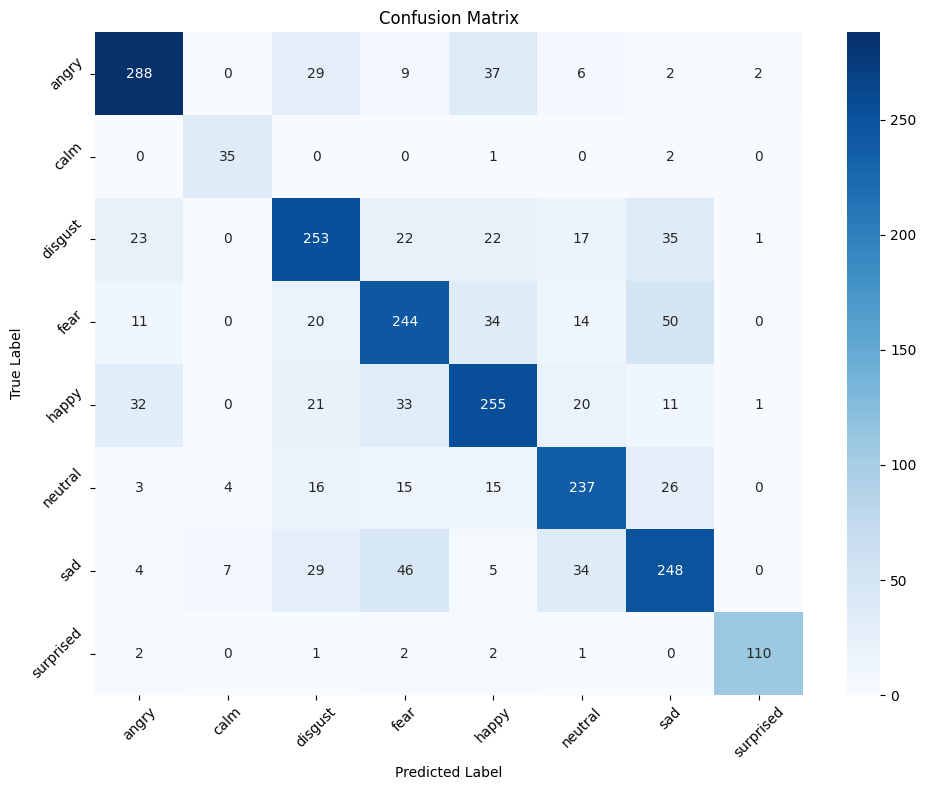

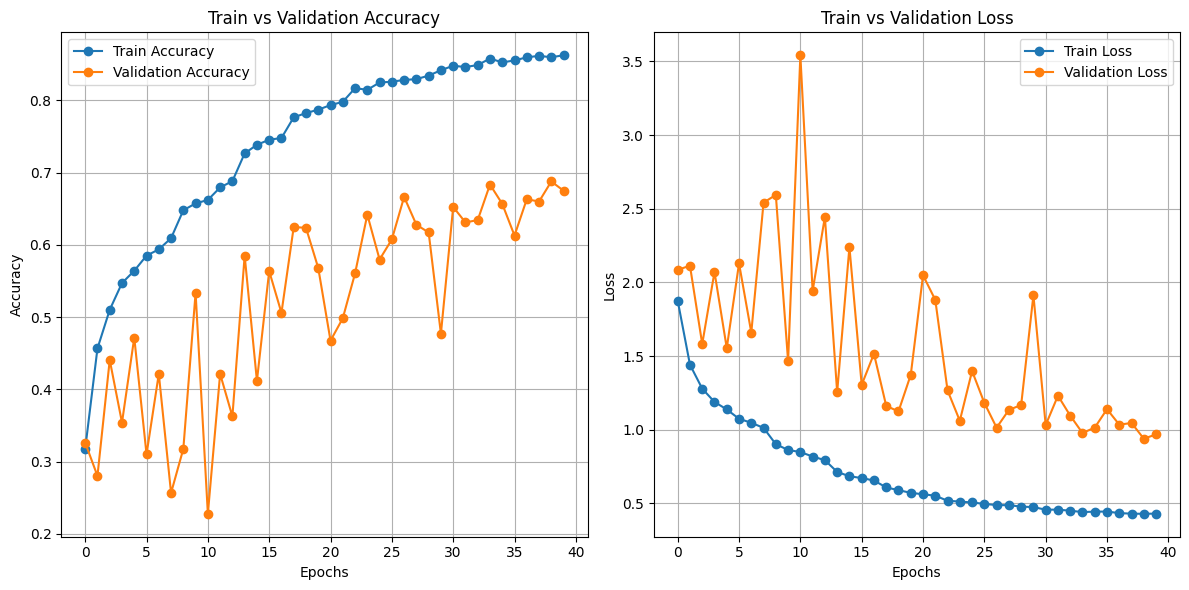

In [ ]:
=from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.utils import to_categorical

y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

print("Shape of X_test:", X_test.shape)  # Optional sanity check

test_loss, test_acc = model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

with open("/content/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

class_names = list(label_encoder.classes_)

print("\nClassification Report:")
print(classification_report(np.argmax(y_test_one_hot, axis=1), y_pred_classes, target_names=class_names, digits=4))

cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define class names (same order as used in label encoder)
class_names = ['Angry', 'Calm', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# --- Feature Extraction ---
def extract_features(audio_file, max_len=173, n_mfcc=40, n_mels=40):
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC and Mel Spectrogram
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Pad/truncate to fixed time dimension
    mfcc = pad_sequences([mfcc.T], maxlen=max_len, padding='post', truncating='post', dtype='float32')[0]
    mel_db = pad_sequences([mel_db.T], maxlen=max_len, padding='post', truncating='post', dtype='float32')[0]

    # Transpose to (40, 173) before stacking
    mfcc = mfcc.T  # (40, 173)
    mel_db = mel_db.T  # (40, 173)

    # Stack to shape (40, 173, 2)
    combined = np.stack((mfcc, mel_db), axis=-1)
    return combined  # (40, 173, 2)

# --- Load Model ---
model = tf.keras.models.load_model('/content/dcnn_model.h5')

# --- Predict Emotion from Audio ---
def predict_emotion(audio_path):
    features = extract_features(audio_path)  # (40, 173, 2)
    features = np.expand_dims(features, axis=0)  # (1, 40, 173, 2)
    predictions = model.predict(features)
    predicted_index = np.argmax(predictions)
    predicted_emotion = class_names[predicted_index]
    return predicted_emotion

# --- Run Prediction ---
audio_file_path = '/content/dataset/tess_processed/OAF_bar_disgust.wav'
emotion = predict_emotion(audio_file_path)
print(f"Predicted Emotion: {emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
Predicted Emotion: Surprised


In [ ]:
from google.colab import files

# Download model
files.download('/content/dcnn_model.h5')

# Download label encoder
files.download('/content/label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>